In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from windrose import WindroseAxes
import matplotlib.dates as mdates
sns.set(style="whitegrid")
df = pd.read_csv("../data/raw/togo-dapaong_qc.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [13]:
print("Summary Statistics:")
print(df.describe())
print("\nMissing Values:")
missing = df.isna().sum()
print(missing)
total_rows = len(df)
print("\nColumns with >5% Missing Values:")
print(missing[missing > 0.05 * total_rows])

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0

In [14]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of rows with outliers (|Z|>3): {outliers.sum()}")
for col in key_cols:
    df[col] = df[col].fillna(df[col].median())
print("\nMissing Values After Imputation:")
print(df[key_cols].isna().sum())
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/togo_dapaong_qc_clean.csv', index=True)
print("Cleaned DataFrame exported to ../data/processed/togo_dapaong_qc_clean.csv")

Number of rows with outliers (|Z|>3): 9251

Missing Values After Imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Cleaned DataFrame exported to ../data/processed/togo_dapaong_qc_clean.csv


d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


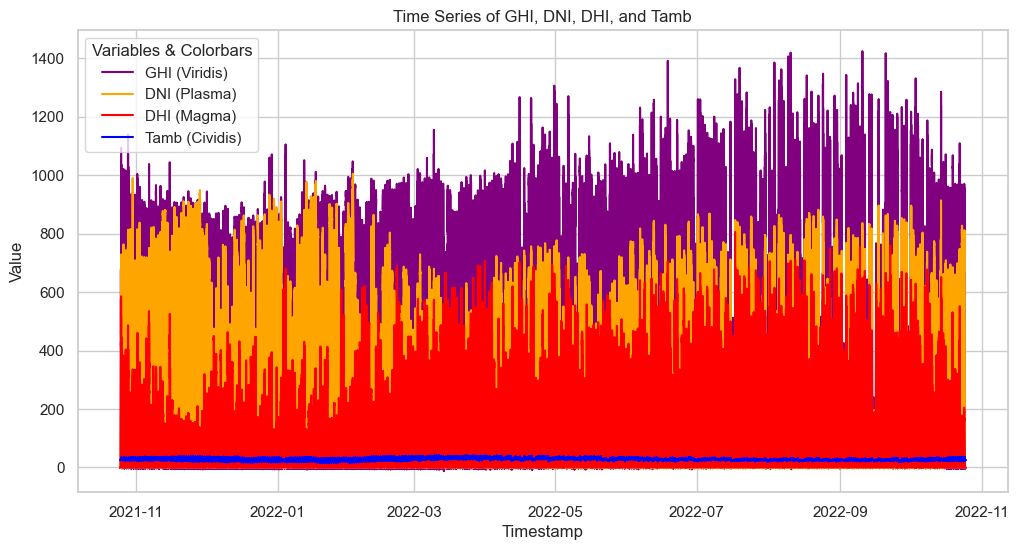

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_8560\644788533.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


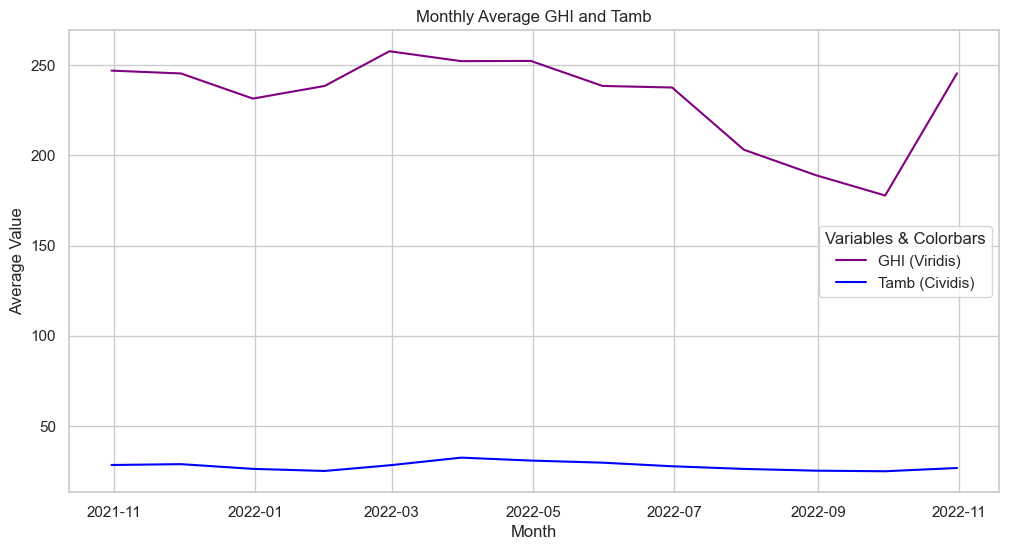

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GHI'], label='GHI (Viridis)', color='purple') 
plt.plot(df.index, df['DNI'], label='DNI (Plasma)', color='orange')  
plt.plot(df.index, df['DHI'], label='DHI (Magma)', color='red')      
plt.plot(df.index, df['Tamb'], label='Tamb (Cividis)', color='blue') 
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.legend(title="Variables & Colorbars")
plt.show()
df_monthly = df.resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['GHI'], label='GHI (Viridis)', color='purple')
plt.plot(df_monthly.index, df_monthly['Tamb'], label='Tamb (Cividis)', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average GHI and Tamb')
plt.legend(title="Variables & Colorbars")
plt.show()

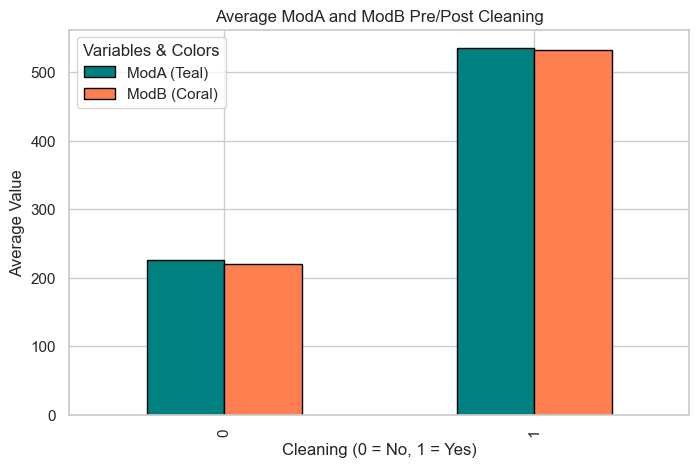

In [16]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
ax = cleaning_impact.plot(kind='bar', figsize=(8, 5), color=['teal', 'coral'], edgecolor='black')
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.legend(labels=['ModA (Teal)', 'ModB (Coral)'], title="Variables & Colors")
plt.show()

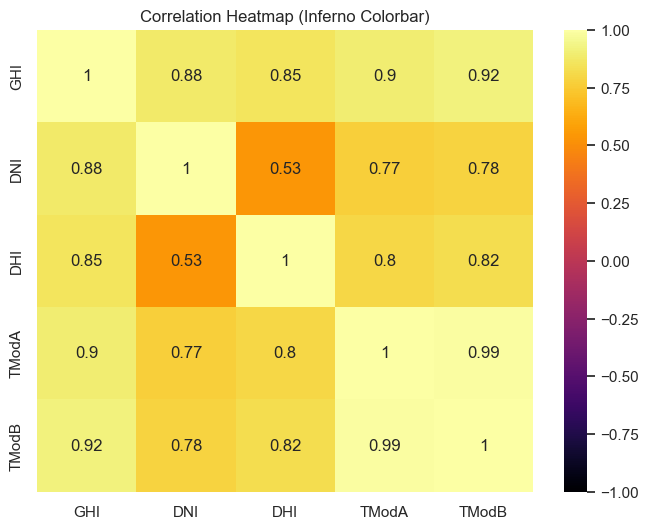

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_8560\3826751099.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


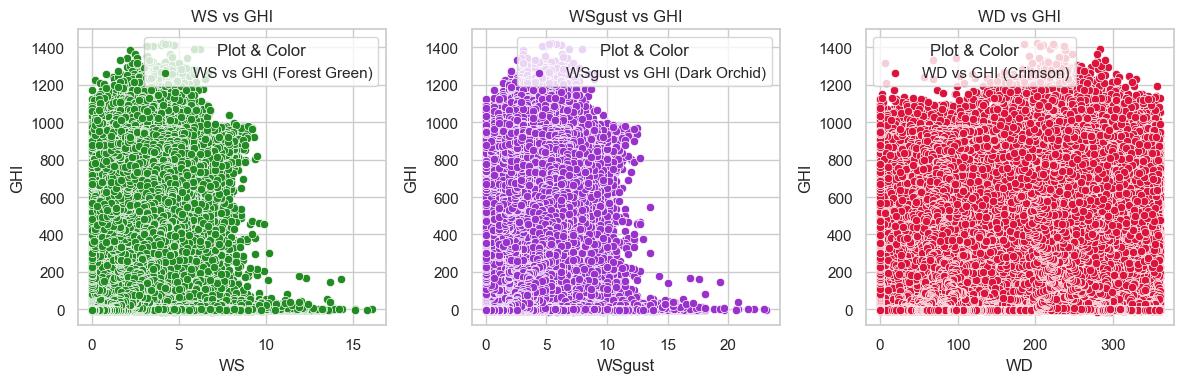

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_8560\3826751099.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


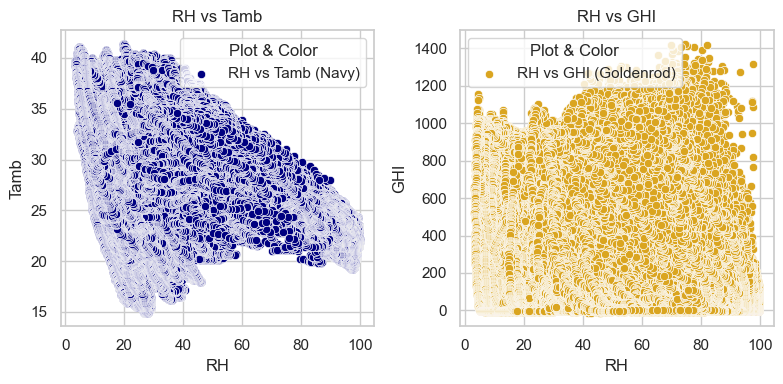

In [17]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Inferno Colorbar)')
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df, color='forestgreen', label='WS vs GHI (Forest Green)')
plt.legend(title="Plot & Color")
plt.title('WS vs GHI')
plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df, color='darkorchid', label='WSgust vs GHI (Dark Orchid)')
plt.legend(title="Plot & Color")
plt.title('WSgust vs GHI')
plt.subplot(1, 3, 3)
sns.scatterplot(x='WD', y='GHI', data=df, color='crimson', label='WD vs GHI (Crimson)')
plt.legend(title="Plot & Color")
plt.title('WD vs GHI')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='navy', label='RH vs Tamb (Navy)')
plt.legend(title="Plot & Color")
plt.title('RH vs Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='goldenrod', label='RH vs GHI (Goldenrod)')
plt.legend(title="Plot & Color")
plt.title('RH vs GHI')
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

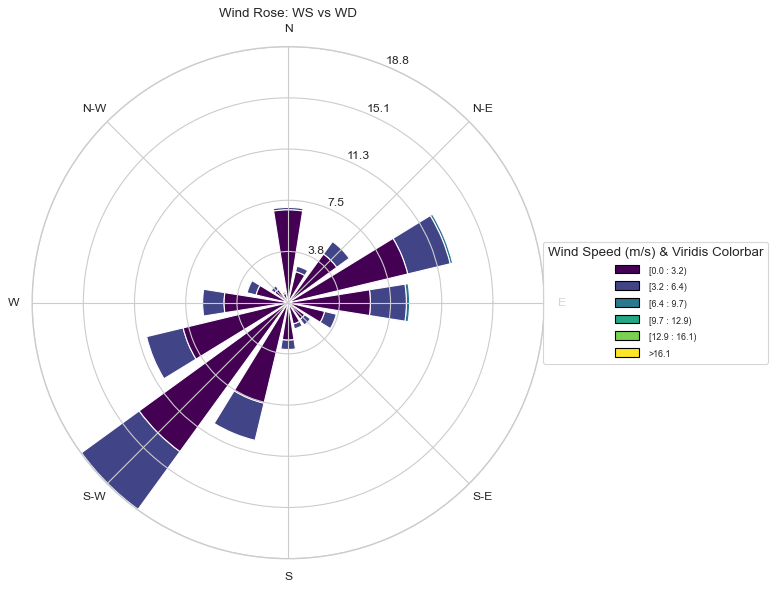

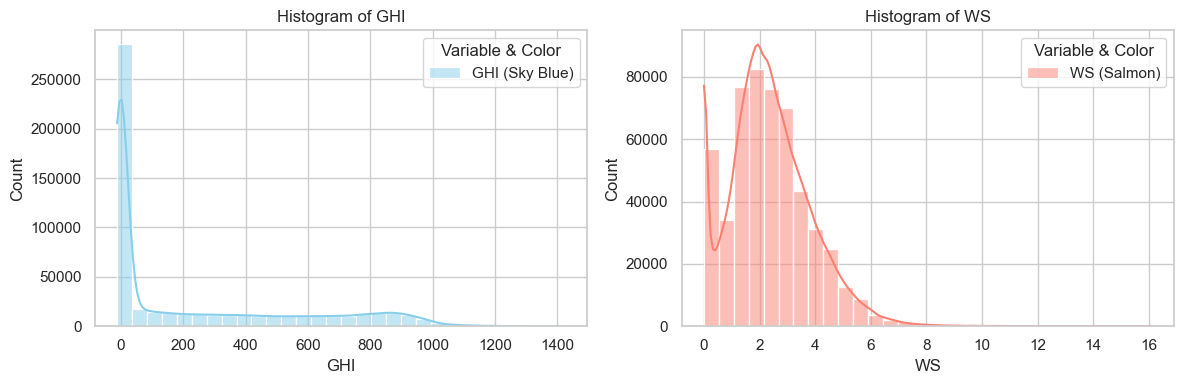

In [18]:
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white', cmap=plt.cm.viridis)
ax.set_legend(title="Wind Speed (m/s) & Viridis Colorbar", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Wind Rose: WS vs WD')
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='skyblue', label='GHI (Sky Blue)')
plt.legend(title="Variable & Color")
plt.title('Histogram of GHI')
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=30, kde=True, color='salmon', label='WS (Salmon)')
plt.legend(title="Variable & Color")
plt.title('Histogram of WS')
plt.tight_layout()
plt.show()

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_8560\1788556614.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


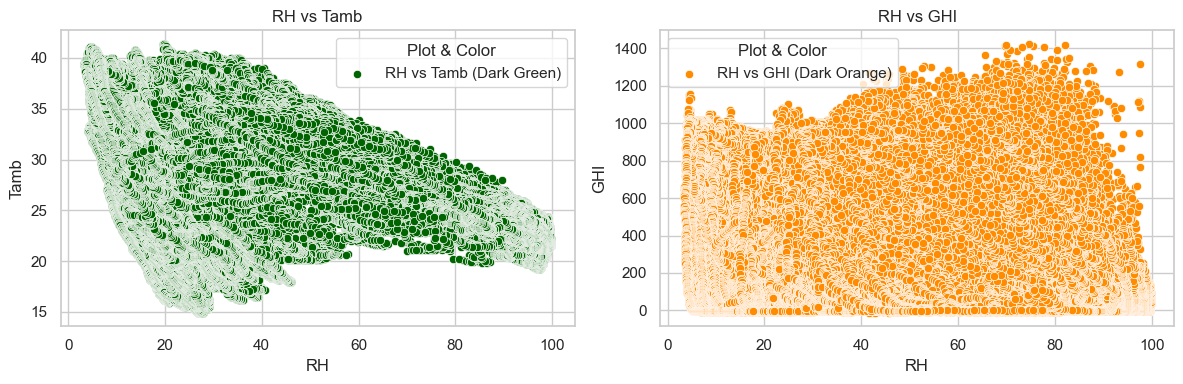

Correlation between RH and Tamb: -0.4004104673516293
Correlation between RH and GHI: -0.2580767185532026


In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='darkgreen', label='RH vs Tamb (Dark Green)')
plt.legend(title="Plot & Color")
plt.title('RH vs Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='darkorange', label='RH vs GHI (Dark Orange)')
plt.legend(title="Plot & Color")
plt.title('RH vs GHI')
plt.tight_layout()
plt.show()
print("Correlation between RH and Tamb:", df['RH'].corr(df['Tamb']))
print("Correlation between RH and GHI:", df['RH'].corr(df['GHI']))

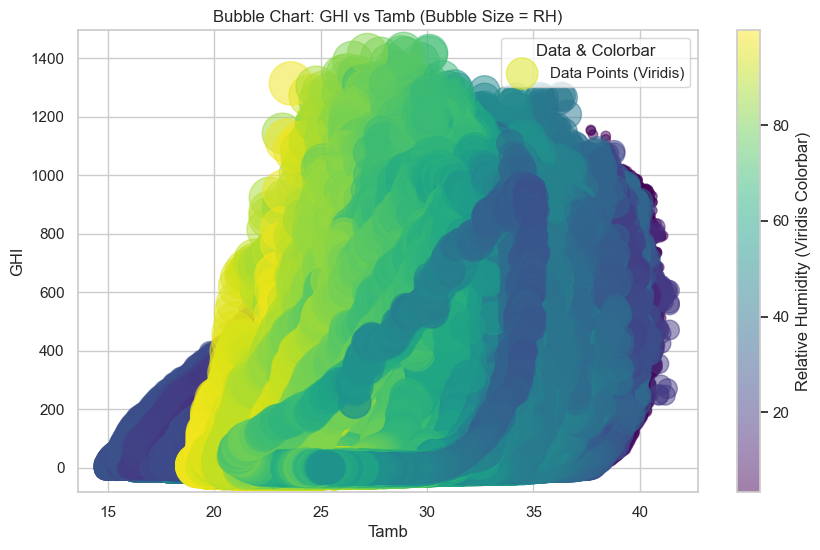

In [20]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5, c=df['RH'], cmap='viridis')
plt.colorbar(scatter, label='Relative Humidity (Viridis Colorbar)')
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.legend(labels=['Data Points (Viridis)'], title="Data & Colorbar")
plt.show()